# Usage of Hurst Exponent

## Problem Statement

This project aims to:

+ Analyse the effectiveness of Hurst Exponent Analysis for trading.

+ Develop modelling techniques to minimize effect of white noise.

In financial markets, two of the most common trading strategies used by investors are the momentum and mean reversion strategies and the Hurst Exponent $H$ can help us determine whether a time series is a random walk $(H \sim 0.5)$, trending $(H \gt 0.5)$ or mean reverting $(H \lt 0.5)$ for a specific period of time. 

The Hurst Exponent of the underlying stock price process will then be combined with other indicators of momentum and/or mean reversion to inform or trading decisions.

## Literature Review

### Introduction

When studying price movements of a financial instrument, modelling them using an accurate stochastic process goes a long way into being able to predict future prices movements and make necessary decisions about what actions to take. 

In most of the cases, stock prices follow a random walk process and can be modeled using a stochastic differential equation of the form [1]:

$$ \large dX(u) = \beta (u, X(u))du + \gamma (u, X(u))dW(u) $$

where $\beta (u, x)$ and $\gamma (u,x)$ are functions called the _drift_ and _diffusion_ of the stock price and $W(u)$ is Brownian motion. Using this basic model, we can define many variations of the stock price model such as Geometric Brownian Motion and Black-Scholes-Merton model for options, the Vasicek, Hull-White and Cox-Ingersoll-Ross models for interest rates, and others such as the Heston and SABR (Stochastic alphs, beta, rho) models for dynamic volatility. They all have an underlying Brownian motion process giving them a random walk behaviour.

On the other hand, the Hurst exponent provides a way to measure the amount by which a financial time series deviates from a pure random walk. It measures the extent to which the underlying process shows a long term trending behaviour or has strongly anti-persistent bahaviour. This type of underlying process helps us model stock price movements more realistically in cases where the equity tends to deviate from the random walk process.

### Body

The thesis paper by Ton Dieker [2] shows how we can use fractional Brownian motion (fBM) to model stochastic process that deviate from a random walk. In Section 1.2 he defines mathematically the concept of fraction Brownian motion and the corresponding incremental process of fractional Gaussian noise.

Following the pioneering work by Mandelbrot and van Ness [3], fractional Brownian motion is defined by its stochastic representation:

$$ \large B_H(t) := \frac{1}{\Gamma \left(H + \frac{1}{2}\right)} \left( \int_{-\infty}^{0} [(t-s)^{H-1/2}-(-s)^{H-1/2}]dB(s) + \int_{0}^{t}(t-s)^{H-1/2}dB(s)\right) $$


where $\Gamma$ represents the Gamma function $\Gamma(\alpha) := \int_{0}^{\infty}x^{\alpha - 1} exp(-x)dx$ and $0 \lt H \lt 1$ is called the Hurst parameter. The integrator $B$ is a stochastic process, ordinary Brownian motion. Note that $B$ is recovered by taking $H = 1/2$. We assume that $B$ is defined on some probability space $(\Omega, \mathcal{F}, P)$.

By this definition of a normalized fractional Brownian motion $B_H = \{B_H(t) : 0 \le t \lt \infty\}$ with $0 \lt H \lt 1$ is uniquely characterized by the following properties [4]:

+ $B_H(t)$ has stationary increments;

+ $B_H(0) = 0$, and $\mathbb{E}[B_H(t)] = 0$ for $t \ge 0$;
  
+ $\mathbb{E}[B_H^2(t)] = t^{2H}$ for $t \ge 0$;
  
+ $B_H(t)$ has a Gaussian distribution for $t \gt 0$.
  
Dieker continues the evaluation of several simulation methods for fractional Brownian motion in his thesis and in Chapter 2 describes some algorithms to simulate fractional Brownian motion (or fractional Gaussian noise). The first part addresses the available exact methods (i.e., the output of the method is a sampled realization of fractional Brownian motion). Several approximate methods are presented in the second part. A number of methods based on the Fast Fourier Transformation (FFT) are also included.

Exact methods studied:

+ The Hosking method [5]

+ The Cholesky method [6]

+ The Davies and Harte method [7]

Approximate methods studied:

+ Stochastic representation method [3]

+ Aggregating packet processes [8]

+ Random Midpoint Displacement [9]

+ Spectral simulation, the Paxson method and the approximate circulant method [10,11]

+ Wavelet-based simulation [12]

In Chapter 3 Dieker discusses some popular methods to estimate the long-range dependence parameter $H$. Although most of the estimation techniques are standard tools in the analysis of long-range dependent processes, a number of recent estimation methods, based on discrete variations and wavelets, are also reviewed. In addition, a test is proposed that is perfectly suitable for our evaluation purposes.

Estimation methods studied:

+ Aggregated variance method [13]

+ Absolute moments method [14]

+ Discrete variations [15]

+ The Higuchi method [16]

+ Periodogram method [17]

+ Variance of the regression residuals [18]

+ Rescaled Range (R/S) analysis [19]

+ Whittle's method [20]

+ Wavelet method [21]

The theory behind these derivations use the stochastic calculus of variations, known as Malliavin calculus, outlined in the lecture notes by Eulalia Nualart [22].

### Conclusion

The Hurst exponent is a parameter used to charcterize a generic fractional Brownian motion process that can be used to model stock prices that are not always based on a random walk. The random walk process is obtained when $H = 1/2$, while processes with $H \gt 1/2$ show long-range dependence or persistent behaviour and $H \lt 1/2$ show anti-persistent bahaviour. Properly identifying such anomalies can in principle be extremely useful for building efficient trading strategies.

The literature review goes through multiple methods for estimating the Hurst exponent from observed timeseries data and multiple methods for simulating fBm processes with a given Hurst exponent. These are important tools that can be used to enhance any existing indicators and data analysis done when trying to predict actions to be taken in a trading scenario. With that information, we can decide which of the two alternate strategies, mean reversion or momentum, is more appropriate to adopt, for a particular timeseries and for a particular time horizon.


### Competitor Analysis

Based on the thesis by Dieker, it is possible to implement some of the simulation and estimation routines in Python, but we found the following Python package by Flynn [23] and Mottl [24] that implements a number of the routines. 

The `fbm` package by Flynn generates Fractional Brownian motion via either Hosking’s method, the Cholesky method, or the Davies-Harte method. All three methods are theoretically exact in generating a discretely sampled fBm/fGn.

The `hurst` package by Mottl is a Python module for analysing random walks and evaluating the Hurst exponent $(H)$ using the Rescaled Range (R/S) analysis originally proposed by Hurst.

In this project we intend to use `hurst` package to analyze time series of stock prices to determine the Hurst parameter of some stock price timeseries to determine if it shows some deviation from the random walk hypothesis. This can then be used directly to make decisions on how to trade the stock directly, or can be combined with Monte Carlo simulations using the `fbm` package to predict future option prices of the underlying stock.

The Hurst exponent will be one of many other indicators used in the decision making process in any algorithm for trading and needs to be backtested to show how effective it would be to use.


## Project Design

### Approach

The overall approach is to take existing trading strategies that utilize momentum and mean reversion and see how they perform with the additional knowledge gained by looking at the Hurst exponent of the stock price series.

For momentum trading strategies we will consider:

+ Simple moving average cross-over.

+ Multiple moving average ribbons.

For mean-reversion strategies we will consider:

+ Single stock mean reversion.

+ Pairs trading.

Given time, we will also look at calculating options prices using Monte Carlo simulation of the underlying stock prices for different $H$ values and see how they differ from the standard Black-Scholes-Merton pricing model.

### Methodology

For each strategy, we are going to:

+ Define the problem.

+ Collect the data.

+ Create the features.

+ Split the data into training and test data sets.

+ Backtest.

+ Optimize the strategy to use.


For the purpose of this project we will be using the Auquan Toolbox [25] for backtesting. This toolbox provides open source Python libraries to quickly:

+ Get Historical Data.

+ Specify Features to be created from the Data.

+ Create a prediction using above features to make a prediction for the market.

+ Execute the strategy using a Trading system for backtesting.

Finally the results of each backtesting execution will return the following final metrics:

1. _Total PnL:_ Total Profit(or Loss) from your strategy as a % of initial capital.

2. _Annualized Return:_ The yearly average % Profit(or Loss) from your trading strategy.

3. _Annualized Volatility:_ The standard deviation of daily returns of the model in a year. Volatility is used as a measure of risk, therefore higher vol implies riskier model.

4. _Sharpe Ratio:_ The reward/risk ratio or risk adjusted returns of the strategy, calculated as Annualized Return/Annualized Volatility.

5. _Sortino Ratio:_ Returns adjusted for downside risk, calculated as Annualized Return/Annualized Volatility of Negative Returns.

6. _Max Drawdown:_ Largest drop in Pnl or maximum negative difference in total portfolio value. It is calculated as the maximum high to subsequent low difference before a new high is reached.

7. _Win/Loss, Average Profit/Loss:_ Sum(or Average) of Profits from trades that results in profits/Sum(or Average) of losses from trades that results in losses

8. _% Profitability:_ % of total trades that resulted in profits

9. _Return on Capital:_ Total Profit(or Loss) from your strategy as a % of max capital used

We will use these metrics to help optimize the strategies to select the best hyper-parameters such as the entry level, stop loss level, profit taking level, moving average time frames, etc.

The best strategies will then be run against a test data set to determine how it behaves on unseen data and help us determine if we had any over-fitting of the training data.

### Desired Outcomes

In momentum and mean-reversion trading strategies, we want to make trading decisons when the stock price we are tracking is showing strong momentum $(H \gt 1/2)$ and mean-reversion $(H \lt 1/2)$ tendencies as measured by the Hurst exponent. In addition to the standard momemtum or mean-reversion indicators such as moving averages and standard deviations we will also calculate the Hurst exponent to inform our trading strategy as to whether the stock price will continue to show momentum or mean-reversion tendencies.

We are hoping that this additional indicator will provide more profitable trades than the standard indicators can and will be measured in terms of Total PnL over a test set over a fixed period of time.

### Working Plan

+ First carry out some exploratory data analysis to find individual stocks that show trending or mean-reverting price behaviour that will be useful for the development of different strategies. Also in this stage we will spend some time selecting stock pairs that would be suitable pairs trading that show highly cointegrated time series.

+ Define a range of time periods over which we want to analyze the data, different sets of entry levels, stop-loss levels and profit-taking levels, and different levels of $H$ that we want to backtest the strategies on. These will be the hyper-parameters that we will tune for each strategy mindful of not overfitting the training data.

+ Evaluate the best strategies on the held out test data to test our hypothesis that the use of the Hurst exponent would lead to more profitable trading strategy and report on the findings.

+ Given time, explore other areas in which the Hurst exponent could be used, such as in Option pricing using simulated stock price paths based on fractional Brownian motion.

## Project Development

### Simulate fractional Brownian Motion

Develop routines to simulate a fBM using the Davies and Harte method, see section 2.1.3 in [2] using the algorithm presented on page 17. 

Plotting four sample paths, each having different values of the Hurst parameter:  𝐻∈{0.2,0.5,0.6,0.9} . Consider  𝑇=1  with  𝑛=2000  time steps.


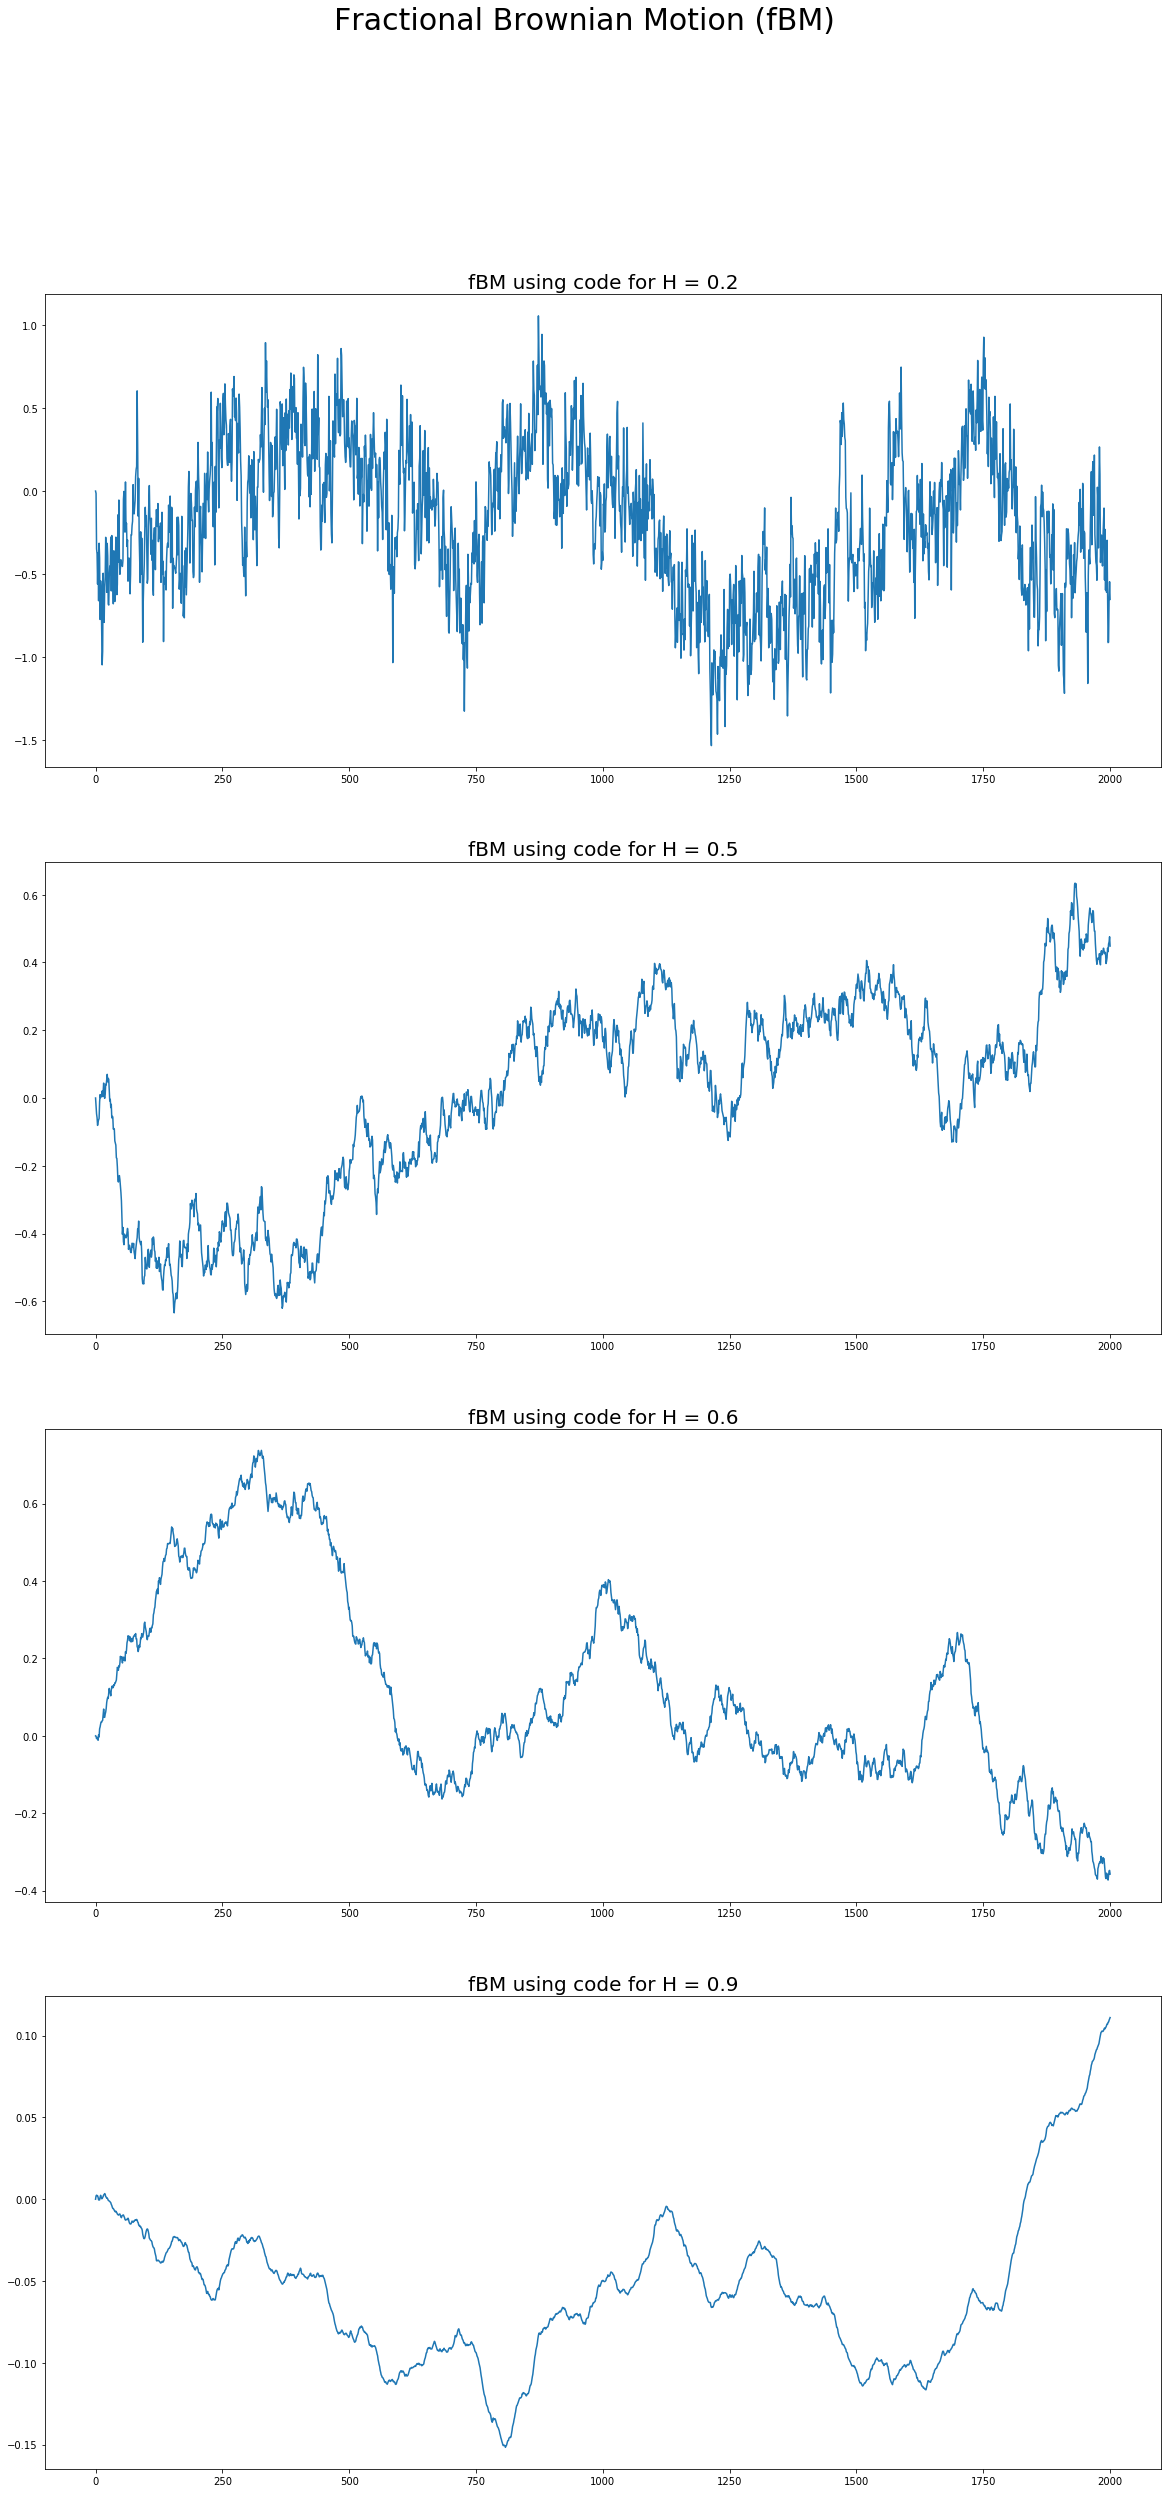

In [2]:
import fractional as f
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 40))
fig.suptitle('Fractional Brownian Motion (fBM)', fontsize=30)

ax1 = plt.subplot2grid((4, 1), (0, 0))
ax1.plot(f.fbmDH(n=2000, H=0.2, T=1), color='#1f77b4')
ax1.set_title('fBM using code for H = 0.2', fontsize=20)

ax2 = plt.subplot2grid((4, 1), (1, 0))
ax2.plot(f.fbmDH(n=2000, H=0.5, T=1), color='#1f77b4')
ax2.set_title('fBM using code for H = 0.5', fontsize=20)

ax3 = plt.subplot2grid((4, 1), (2, 0))
ax3.plot(f.fbmDH(n=2000, H=0.6, T=1), color='#1f77b4')
ax3.set_title('fBM using code for H = 0.6', fontsize=20)

ax4 = plt.subplot2grid((4, 1), (3, 0))
ax4.plot(f.fbmDH(n=2000, H=0.9, T=1), color='#1f77b4')
ax4.set_title('fBM using code for H = 0.9', fontsize=20)

plt.show()

### Calculate Options using fBM

The observed dependence structure of log returns can be modeled using an fBm process. Specifically, consider a regular geometric Brownian motion model, with $W_t$ replaced by an fBm $Z_t$, having $\mathbb{E}[Z_t^2] = t^{2H}$:

$$\large dS_t = S_t(rdt + \sigma dZ_t), S(0) = S_0$$

When $H = \frac{1}{2}$ the fBm becomes a standard Brownian motion. Thus, this model is an extension of the Black-Scholes-Merton model. 

Pricing a European call option under this model, with $S_0 = K = 100, T = 1, r = 5\%$, and $\sigma = 20\%$ using a Monte Carlo simulation with an Euler discretization. 

Consider at least 1 million paths and four different values of the Hurst parameter, i.e. $H \in \{0.2, 0.5, 0.6, 0.9\}$. 

Compared with the result obtained using the classical Black-Scholes model.


In [4]:
import pandas as pd
import hurstoptions as ho

S0 = 100.0
K = 100.0
r = 0.05
delta = 0.0
T = 1.0
sigma = 0.2

# Calculate the analytical BS call option price
BS = ho.BSDivCallValue(sigma, S0, K, r, delta, T)

# Calculate Monte Carlo call option price using different values of N and M
MC_H02 = ho.EuropeanOptionPriceHurst(sigma, S0, K, r, delta, T, H=0.2, N=300, M=1000000)
MC_H05 = ho.EuropeanOptionPriceHurst(sigma, S0, K, r, delta, T, H=0.5, N=300, M=1000000)
MC_H06 = ho.EuropeanOptionPriceHurst(sigma, S0, K, r, delta, T, H=0.6, N=300, M=1000000)
MC_H09 = ho.EuropeanOptionPriceHurst(sigma, S0, K, r, delta, T, H=0.9, N=300, M=1000000)

# Store results in a dataframe
MC_results = pd.DataFrame({"Analytic Price": [BS, BS, BS, BS],
                            "N": [300, 300, 300, 300],
                            "M": [1000000, 1000000, 1000000, 1000000],
                            "H": [0.2, 0.5, 0.6, 0.9],
                            "Monte Carlo Price": [MC_H02, MC_H05, MC_H06, MC_H09]})
print(MC_results)

   Analytic Price    N        M    H  Monte Carlo Price
0       10.450584  300  1000000  0.2         109.031845
1       10.450584  300  1000000  0.5          10.446981
2       10.450584  300  1000000  0.6           6.344857
3       10.450584  300  1000000  0.9           2.981394


### Backtest Momentum Strategies

Using the Auquan Toolbox as a backtester, we will backtest the momentum strategy for a number of different scenarios.

#### Single Stock without Hurst Indicator

In this case we are going to apply a momentum strategy to a single stock using standard moving average cross-over logic to generate the trading signals.


In [6]:
%%capture
import plainmomentum as pm

result = pm.run_plain_momentum()

In [9]:
import json

print(json.dumps(result, indent=2))

{
  "instrument_names": [
    "AAPL"
  ],
  "instrument_stats": [
    {
      "pnl": {
        "AAPL": -0.04864878
      },
      "score": {
        "AAPL": -1.8440697927062684
      }
    }
  ],
  "pnl": -0.04864878,
  "trading_days": 694,
  "annual_return": -0.017946144663684493,
  "annual_vol": 0.024309587940541656,
  "sharpe_ratio": -0.7382331904423315,
  "score": -1.8440697927062684,
  "total_profit": 339.9253480000002,
  "portfolio_value": 951.35122,
  "count_profit": 311,
  "variance": 2.34506375332908,
  "total_loss": 388.5741280000003,
  "capital": 850.9438029999993,
  "count_loss": 338,
  "maxDrawdown": 72.09126200000003,
  "maxPortfolioValue": 1023.442482,
  "capitalUsage": 148.65469090000067
}


#### Single Stock with Hurst Indicator

In this case we are going to apply the same momentum strategy as before to a single stock using standard moving average cross-over logic and the Hurst indicator to generate the trading signals.

(still debugging this code)

In [13]:
%%capture
import hurstmomentum as hm

result = hm.run_hurst_momentum()

AttributeError: module 'fractional' has no attribute 'hurst_f'

In [ ]:
print(json.dumps(result, indent=2))

#### Stock Pairs without Hurst Indicator

In this case we are going to apply a pairs trading strategy to a pair of stocks selected to have closely co-integrated price series.

(being developed)

#### Stock Pairs with Hurst Indicator

In this case we are going to apply a pairs trading strategy to a pair of stocks selected to have closely co-integrated price series and using the Hurst indicator on the price ratios to generate the trading signals.

(being developed)

## Bibliography

[1] **Shreve, Steven E.**, "Stochastic Calculus for Finance II: Continuous-Time Models, Volume 11", _Springer Science & Business Media_, (2004).

[2] **Dieker, Ton**, "Simulation of fractional Brownian motion". _M.Sc. theses, University of Twente, Amsterdam, The Netherlands_ (2004).

[3] **B.B. Mandelbrot and J.W. van Ness**, "Fractional Brownian motions, fractional noises and applications", _SIAM Review, 10_ (1968).

[4] **I. Norros**, "A storage model with self-similar input", _Queueing Systems, 16_ (1994).

[5] **J.R.M. Hosking**, "Modeling persistence in hydrological time series using fractional differencing", _Water resources research, 20_ (1984).

[6] **S. Asmussen**, "Stochastic simulation with a view towards stochastic processes". _Notes of a Concentrated Advance Course at MaPhySto, Aarhus, Denmark_, (1999).

[7] **R.B. Davies and D.S. Harte**, "Tests for Hurst effect", _Biometrika, 74_ (1987).

[8] **W. Willinger, M.S. Taqqu, R. Sherman, and D.V. Wilson**, "Self-similarity through highvariability: statistical analysis of Ethernet LAN traffic at the source level", _IEEE/ACM Transactions on Networking, 5_ (1997).

[9] **W-C. Lau, A. Erramilli, J.L. Wang, and W. Willinger**, "Self-similar traffic generation: the random midpoint displacement algorithm and its properties", _in Proceedings of ICC '95_, (1995).

[10] **A. B. Dieker and M. Mandjes**, "On spectral simulation of fractional Brownian motion", _Probab. Engrg. Inform. Sci., 17_ (2003).

[11] **V. Paxson**, "Fast, approximate synthesis of fractional Gaussian noise for generating self-similar network traffic", _Computer Communication Review, 27_ (1997).

[12] **A. Ayache and M. S. Taqqu**, "Approximating fractional Brownian motion by a random wavelet series: the rate optimality problem". _J. Fourier Anal. Appl._, (2003).

[13] **J. Beran**, "Statistics for long-memory processes", _no. 61 in Monographs on statistics and applied probability, Chapman and Hall_, (1994).

[14] **M.S. Taqqu, V. Teverovsky, and W. Willinger**, "Estimators for long-range dependence: an empirical study", _Fractals, 3_ (1995).

[15] **J.F. Coeurjolly**, "Inference statistique pour les mouvements browniens fractionnaires et multifractionnaires", _PhD thesis, Universite Joseph Fourier_, (2000).

[16] **T. Higuchi**, "Approach to an irregular time series on the basis of the fractal theory", _Physica D, 31_ (1988).

[17] **M.B. Priestley**, "Spectral analysis and time series, vol. 1", _Academic Press_, (1981).

[18] **C.K. Peng, S.V. Buldyrev, M. Simons, H.E. Stanley, and A.L. Goldberger**, "Mosaic organization of DNA nucleatides", _Physical Review E, 49_ (1994).

[19] **Hurst, H. E.** "Long-term storage capacity of reservoirs". _Transactions of the American Society of Civil Engineers, 116_ (1951).

[20] **Whittle, P.** "Hypothesis testing in times series analysis". _Uppsala: Almqvist & Wiksells Boktryckeri AB_ (1951).

[21] **P. Abry, P. Goncalves, and P. Flandrin**, "Wavelets, spectrum analysis and 1/f processes", _Wavelets and statistics, A. Antoniadis and G. Oppenheim, eds., vol. 103 of Lecture Notes in Statistics, Springer-Verlag, New York_, (1995).

[22] **Nualart, Eulalia** "Lectures on Malliavin calculus and its applications to finance" _Lecture Notes_, (2009) http://www.math.wisc.edu/~kurtz/NualartLectureNotes.pdf

[23] **Flynn, Christopher** "fbm 0.3.0", _a Python package_ (2016). https://pypi.org/project/fbm/

[24] **Mottl, Dmitry** "hurst 0.0.5", _a Python package_ (2019). https://pypi.org/project/hurst/

[25] **Auquan Inc.** "AuquanToolbox", _a Python package_ (2017). https://bitbucket.org/auquan/auquantoolbox/wiki/Home